Importing Keras libraries

In [1]:
import keras

Importing ImageDataGenerator from Keras

In [2]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Defining the Parameters

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

Applying ImageDataGenerator functionality to train dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/content/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 437 images belonging to 2 classes.


Applying ImageDataGenerator functionality to test dataset

In [6]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/content/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 123 images belonging to 2 classes.


Importing Model Building Libraries

In [7]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

Initializing the model

In [8]:
model=Sequential()

Adding CNN Layers

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

Add Dense layers

In [10]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

configuring the learning process

In [11]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

Training the model

In [12]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 137s 10s/step - loss: 2.6519 - accuracy: 0.5973 - val_loss: 0.3201 - val_accuracy: 0.9512
Epoch 2/10
14/14 [==============================] - 29s 2s/step - loss: 0.4036 - accuracy: 0.8215 - val_loss: 0.1439 - val_accuracy: 0.9756
Epoch 3/10
14/14 [==============================] - 28s 2s/step - loss: 0.3031 - accuracy: 0.8764 - val_loss: 0.1056 - val_accuracy: 0.9512
Epoch 4/10
14/14 [==============================] - 28s 2s/step - loss: 0.2369 - accuracy: 0.8947 - val_loss: 0.0950 - val_accuracy: 0.9593
Epoch 5/10
14/14 [==============================] - 29s 2s/step - loss: 0.1936 - accuracy: 0.9016 - val_loss: 0.0755 - val_accuracy: 0.9756
Epoch 6/10
14/14 [==============================] - 29s 2s/step - loss: 0.1740 - accuracy: 0.9405 - val_loss: 0.1586 - val_accuracy: 0.9431
Epoch 7/10
14/14 [==============================] - 30s 2s/step - loss: 0.1796 - accuracy: 0.9336 - val_loss: 0.0842 - val_accuracy: 0.9675
Epoch 8/10
14/14 [

Save the model

In [13]:
model.save("/content/drive/MyDrive/IBM PROJECT/forest.h5")

Predictions

In [14]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("/content/drive/MyDrive/IBM PROJECT/forest.h5")
img=image.load_img('/content/drive/MyDrive/IBM PROJECT/final.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [15]:
pred=model.predict(x)

1/1 [==============================] - 0s 358ms/step


In [16]:
pred

array([[1.]], dtype=float32)

In [17]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=8b463ef5bf40bc5030fc06e206f8e82ed24bd6d6762b0ac13cf3addf523a6dec
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [19]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 


In [20]:
import cv2

In [21]:
import numpy as np

In [22]:
from keras.models import load_model

In [23]:
from twilio.rest import Client

In [24]:
from playsound import playsound

In [25]:
model=load_model('/content/drive/MyDrive/IBM PROJECT/forest.h5')

In [26]:
video = cv2.VideoCapture("/content/drive/MyDrive/IBM PROJECT/final.jpg")

In [27]:
name=['forest','with fire']

In [28]:
from google.colab.patches import cv2_imshow

1/1 [==============================] - 0s 222ms/step
[[1.]]
SMc850f5b687d56276c3ef94721d1e4206
Fire Detected
SMS sent!


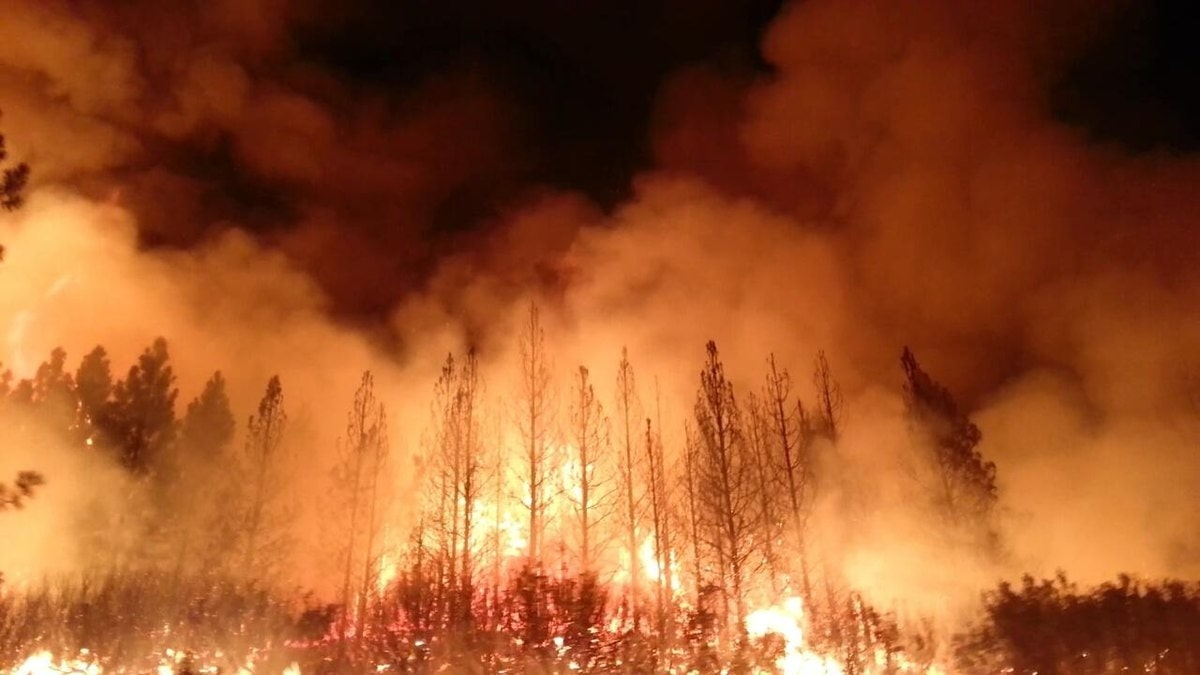

error: ignored

In [29]:
while(1):
  success,frame=video.read()
  cv2.imwrite("img.jpg",frame)
  img=image.load_img("img.jpg",target_size=(64,64))
  x=image.img_to_array(img)
  res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
  x=np.expand_dims(res,axis=0)
  pred=model.predict(x)
  p=pred[0]
  print(pred)
  #cv2.putText(frame,"predicted class = "+str(name[p]),(100,100),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0))
  if pred[0]==0:
        print('No Danger')
  else:
    #twilio account ssid
    account_sid='AC0317e5b10205207aff7b3ced4fc426a2'
    #twilio account authentication token
    auth_token ='25b72b128814d01ef03b4c1d5798de33'
    client=Client(account_sid,auth_token)

    message=client.messages \
    .create(
        body='Forest Fire is detected,stay alert',
        #use twilio free number
        from_='+19896012535',
        #to number
        to='+916385229957')
    print(message.sid)
    print('Fire Detected')
    print('SMS sent!')

    #break
  imgs = cv2.imread("/content/drive/MyDrive/IBM PROJECT/final.jpg")
  cv2_imshow(imgs)
  if cv2.waitKey(1) & 0xFF == ord('a'):
     break
video.release()
cv2.destroyAllWindows()